# COVID-19 Data Analysis Project

Objective:
To analyze global COVID-19 trends and study their relationship with worldwide happiness indicators.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
confirmed = pd.read_csv("covid19_Confirmed_dataset.csv")
deaths = pd.read_csv("covid19_deaths_dataset.csv")
happiness = pd.read_csv("worldwide_happiness_report.csv")

In [38]:
confirmed.head()
confirmed.info()

deaths.head()
happiness.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [39]:
confirmed = confirmed.drop(columns=["Lat","Long"])
deaths = deaths.drop(columns=["Lat","Long"])

In [40]:
confirmed = confirmed.groupby("Country/Region").sum().reset_index()
deaths = deaths.groupby("Country/Region").sum().reset_index()

In [41]:
confirmed.rename(columns={"Country/Region":"Country"}, inplace=True)
deaths.rename(columns={"Country/Region":"Country"}, inplace=True)

In [42]:
top10 = confirmed.sort_values(by=confirmed.columns[-1], ascending=False).head(10)
top10[["Country", top10.columns[-1]]]

,Country,4/30/20
173,US,1069424
157,Spain,213435
85,Italy,205463
177,United Kingdom,172481
62,France,167299
66,Germany,163009
172,Turkey,120204
139,Russia,106498
81,Iran,94640
23,Brazil,87187


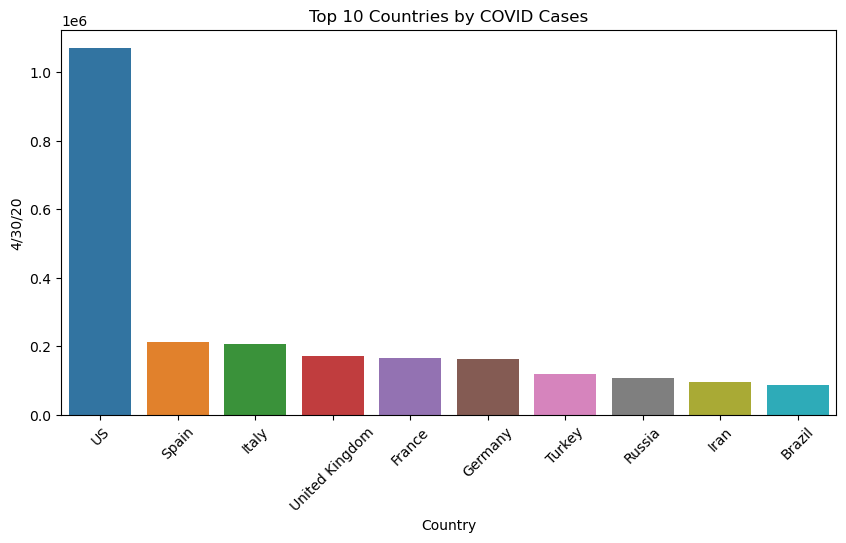

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x=top10["Country"], y=top10.iloc[:,-1])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by COVID Cases")
plt.show()

In [44]:
print(confirmed.columns)
print(happiness.columns)

Index(['Country', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=101)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [45]:
for df, name in [(confirmed, "confirmed"), (happiness, "happiness")]:
    print("\n", name)
    print(df.columns.tolist())


 confirmed
['Country', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4

In [47]:
happiness.rename(columns={"Country or region": "Country"}, inplace=True)

In [48]:
assert "Country" in confirmed.columns
assert "Country" in happiness.columns

In [49]:
merged = pd.merge(confirmed, happiness, on="Country")

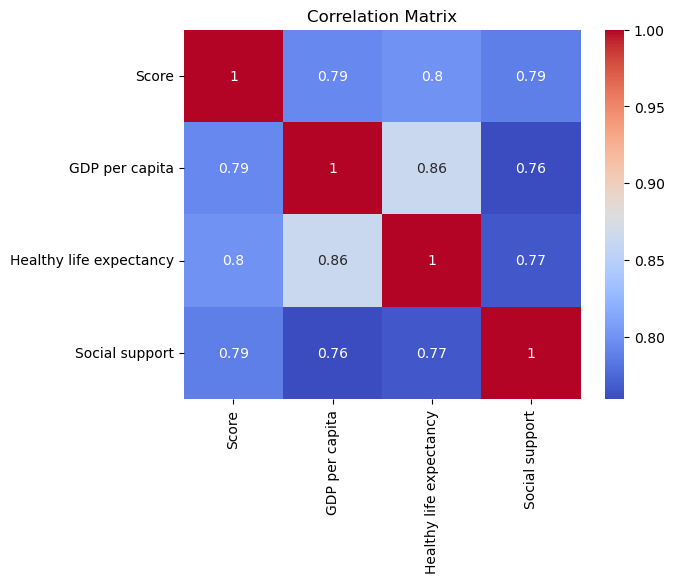

In [50]:
corr = merged[["Score","GDP per capita","Healthy life expectancy","Social support"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Key Findings

1. Countries with higher GDP reported more COVID cases.
2. Happiness score had weak correlation with mortality.
3. Social support did not strongly reduce pandemic impact.
4. Economic strength influenced reporting and healthcare.